Dashboard Code

In [ ]:
# Import required libraries
import pandas as pd
import dash
from dash import html
from dash import dcc
from dash.dependencies import Input, Output
import plotly.express as px

# Read the airline data into pandas dataframe
spacex_df = pd.read_csv("spacex_launch_dash.csv")
max_payload = spacex_df['Payload Mass (kg)'].max()
min_payload = spacex_df['Payload Mass (kg)'].min()

# Create a dash application
app = dash.Dash(__name__)

# Clear the layout and do not display exception till callback gets executed
#app.config.suppress_callback_exceptions = True

# Create an app layout
app.layout = html.Div(children=[html.H1('SpaceX Launch Records Dashboard',
                                        style={'textAlign': 'center', 'color': '#503D36',
                                               'font-size': 40}),
                                # TASK 1: Add a dropdown list to enable Launch Site selection
                                # The default select value is for ALL sites
                                dcc.Dropdown(id='site_dropdown',
                                options=[
                                    {'label':'All Sites', 'value':'ALL'},
                                    {'label':'CCAFS LC-40', 'value':'CCAFS LC-40'},
                                    {'label':'VAFB SLC-4E', 'value':'VAFB SLC-4E'},
                                    {'label': 'KSC LC-39A', 'value':'KSC LC-39A'},
                                    {'label':'CCAFS SLC-40', 'value':'CCAFS SLC-40'}
                                ],
                                value='ALL',
                                placeholder='Select Launch Site',
                                searchable=True),

                                html.Br(),

                                # TASK 2: Add a pie chart to show the total successful launches count for all sites
                                # If a specific launch site was selected, show the Success vs. Failed counts for the site
                                
                                html.Div(dcc.Graph(id='success-pie-chart')),
                                html.Br(),

                                html.P("Payload range (Kg):"),
                                # TASK 3: Add a slider to select payload range
                                dcc.RangeSlider(id='payload-slider',
                                                min=0, max=10000, step=1000,
                                                marks={0:'0', 1000:'1000', 2000:'2000', 3000:'3000',4000:'4000',5000:'5000',6000:'6000', 7000:'7000', 8000:'8000', 9000:'9000', 10000:'10000'},
                                                value=[min_payload, max_payload]),

                                # TASK 4: Add a scatter chart to show the correlation between payload and launch success
                                html.Div(dcc.Graph(id='success-payload-scatter-chart')),
                                ])


# TASK 2:
# Add a callback function for `site-dropdown` as input, `success-pie-chart` as output
@app.callback(Output(component_id='success-pie-chart', component_property='figure'),
               Input(component_id='site_dropdown', component_property='value'))

def get_pie_chart(entered_site):
    filtered_df=spacex_df
    if entered_site=='ALL':
        fig=px.pie(filtered_df, values='class',
                   names='Launch Site',
                   title='Total Number of Successful Launches')
        return fig
    else:
        filtered_df = spacex_df[spacex_df['Launch Site'] == entered_site].groupby(['Launch Site', 'class']).size().reset_index(name='class count')
        fig=px.pie(filtered_df, values='class count',
                    names='class',
                    title='Success vs Failure at Launch Site {}'.format(entered_site))
        return fig

# TASK 4:
# Add a callback function for `site-dropdown` and `payload-slider` as inputs, `success-payload-scatter-chart` as output
@app.callback(Output(component_id='success-payload-scatter-chart', component_property='figure'),
              [Input(component_id='site_dropdown', component_property='value'),
              Input(component_id='payload-slider', component_property='value')])

def get_scatter_plot(site_name, slider_range):
    
    low,high=slider_range
    filtered_df=spacex_df
    mask=(filtered_df['Payload Mass (kg)'] < high) & (filtered_df['Payload Mass (kg)'] > low)
    
    if site_name=='ALL':
        mask=(filtered_df['Payload Mass (kg)'] < high) & (filtered_df['Payload Mass (kg)'] > low)
        
        fig=px.scatter(filtered_df[mask], x='Payload Mass (kg)',
                        y='class',
                        color='Booster Version Category',
                        title='Payload Outcomes for Accross All Sites')
        return fig    
    else:
        filtered_df = spacex_df[spacex_df['Launch Site'] == site_name]
        mask=(filtered_df['Payload Mass (kg)'] < high) & (filtered_df['Payload Mass (kg)'] > low)
        
        fig=px.scatter(filtered_df[mask], x='Payload Mass (kg)',
                        y='class',
                        color='Booster Version Category',
                        title='Payload Outcomes at Launch Site {}'.format(site_name))
        return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

Dashboard at Initial Startup

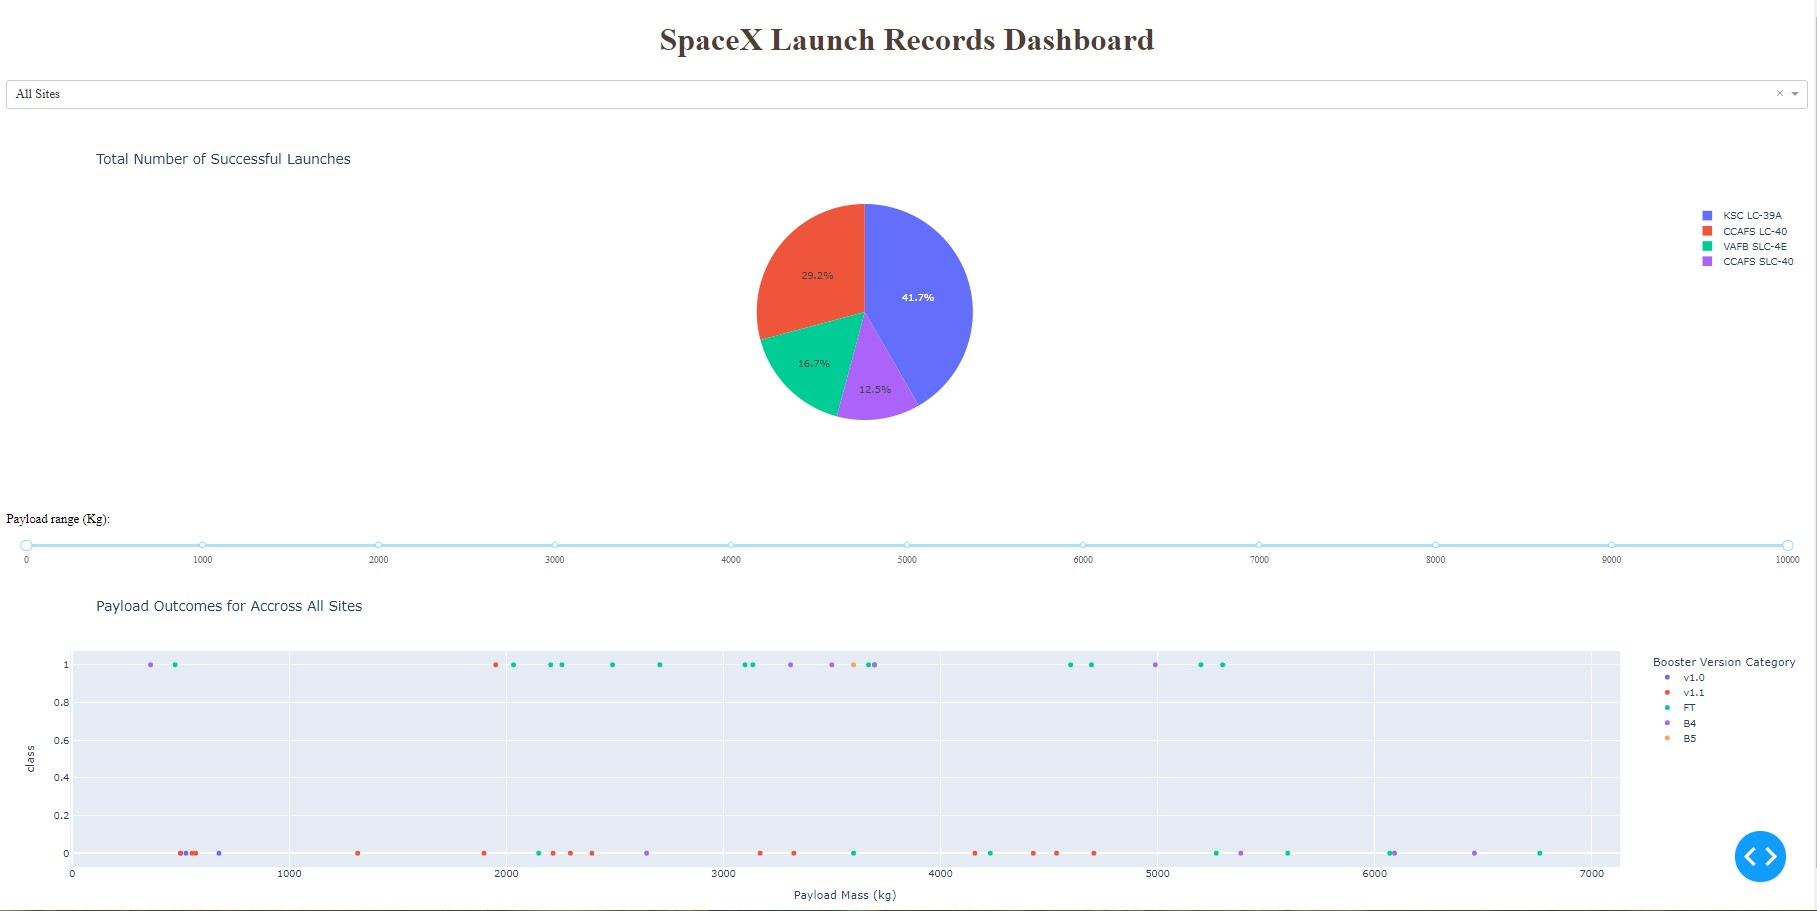

QUESTION 1: Which site has the largest successful launches?

ANSWER:KSC LC-39A

QUESTION 2: Which site has the highest launch success rate?

ANSWER: KSC LC-39A

QUESTION 3: Which payload range(s) has the highest launch success rate?

ANSWER: The highest launch success rate is with a payload between 2,000 and 4,000 kg

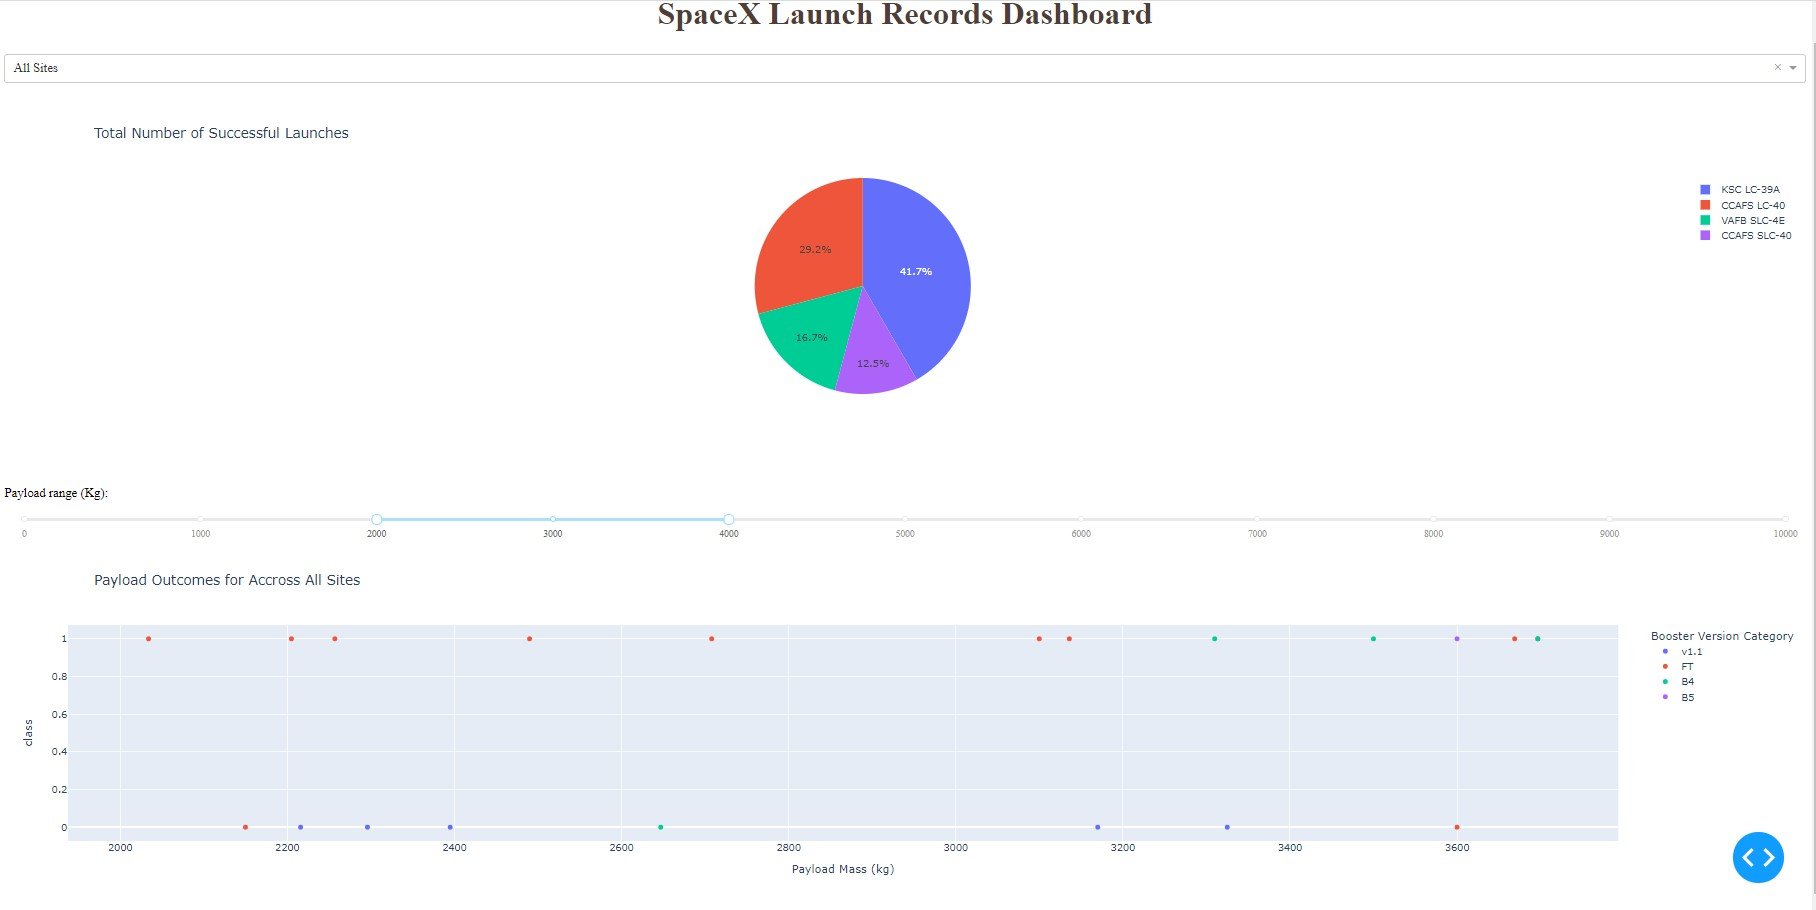

QUESTION 4: Which payload range(s) has the lowest launch success rate?

ANSWER: The lowest success launch rate was for launches with payloads above 5,300 kg.

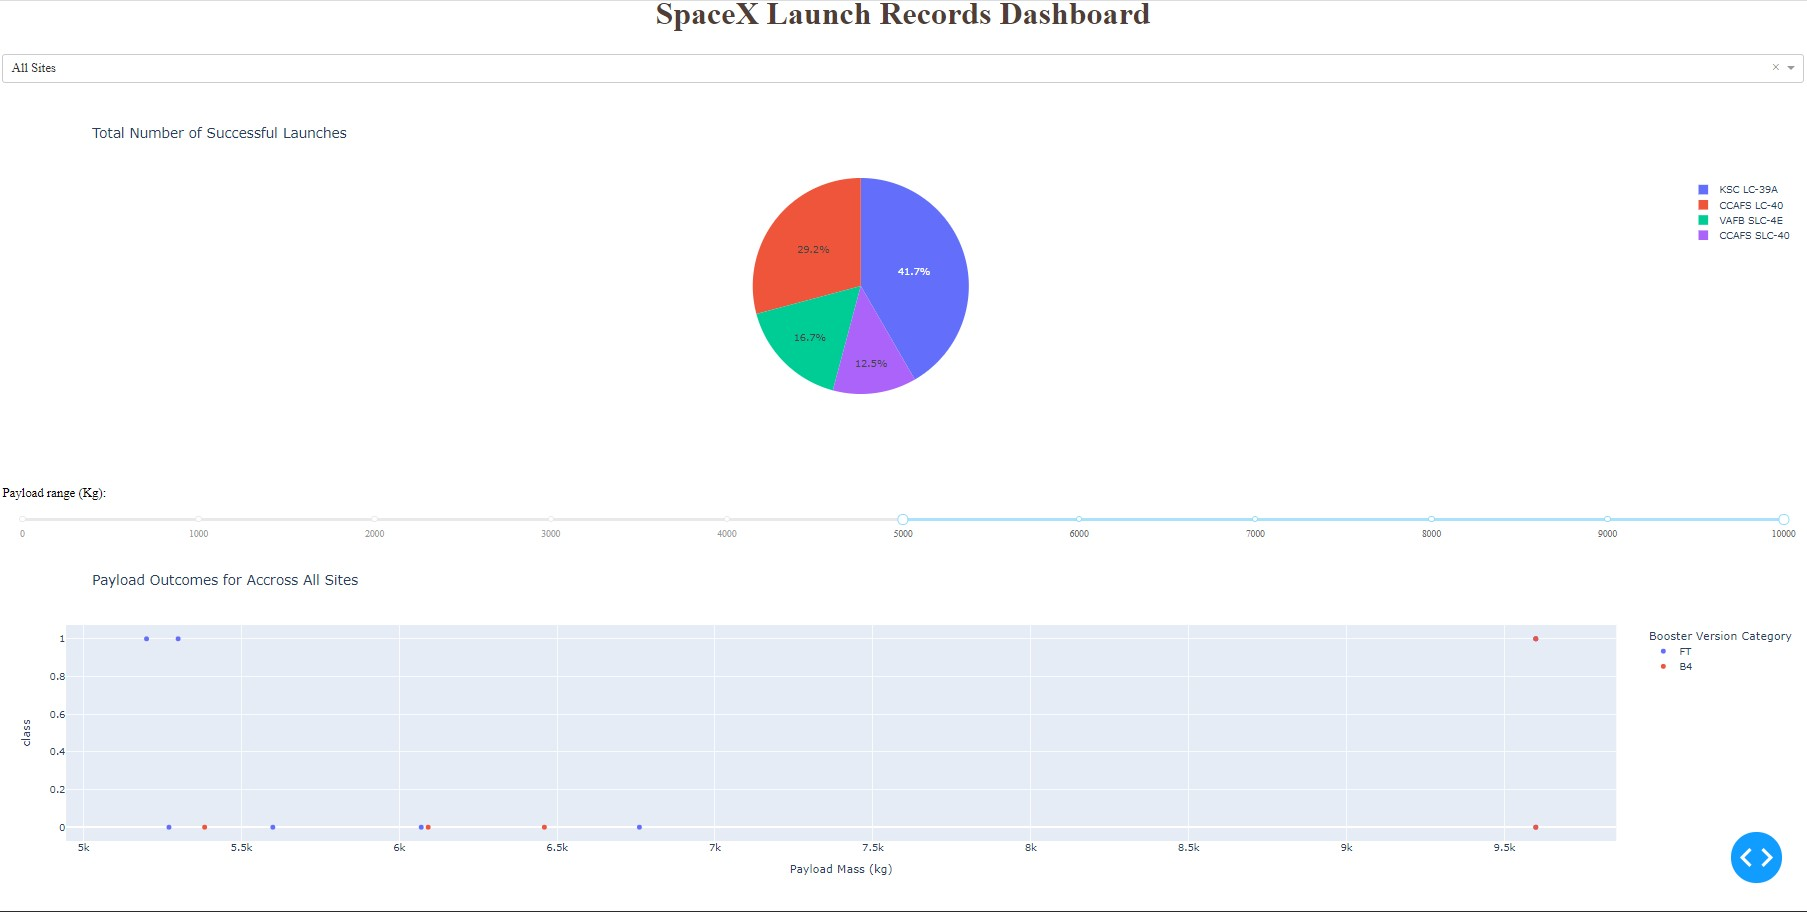

QUESTION 5: Which F9 Booster version (v1.0, v1.1, FT, B4, B5, etc.) has the highest launch success rate?

ANSWER: The FT Booster

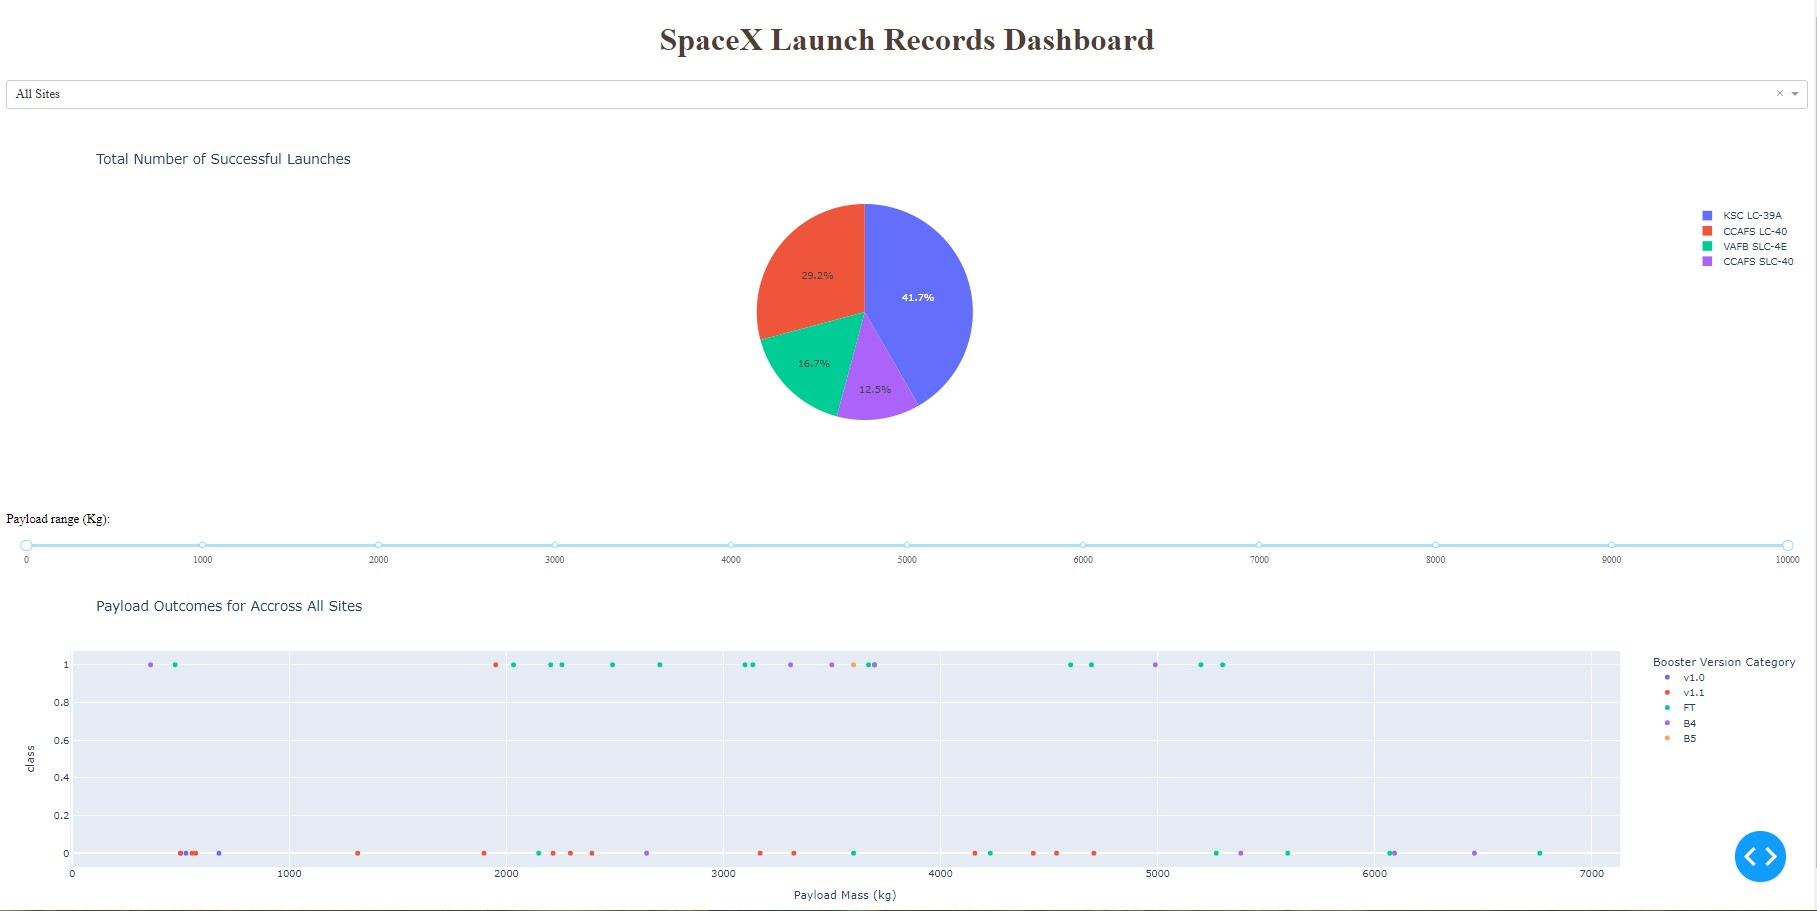